In [146]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits()

In [147]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)

# Print to show there are 1797 labels (integers from 0-9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


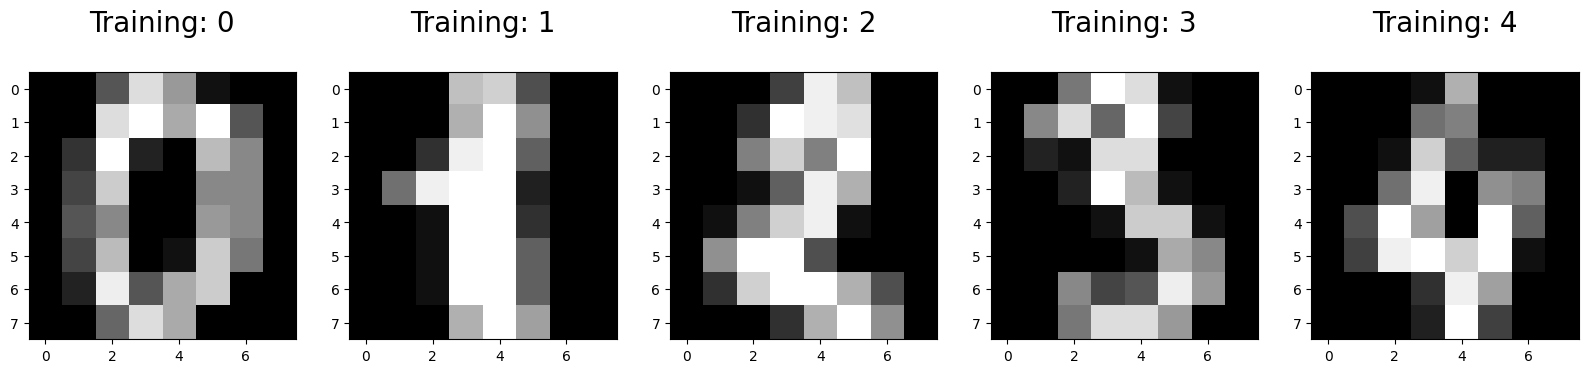

In [148]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [149]:
train_data = pd.DataFrame(digits.data)
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [150]:
X = train_data.iloc[:,1:]
y = pd.DataFrame(digits.target)

y.value_counts().sort_index()

0    178
1    182
2    177
3    183
4    181
5    182
6    181
7    179
8    174
9    180
Name: count, dtype: int64

In [151]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state =0 )

The purpose of splitting data into training and test data is to develop a model using only training data then using the test data to test the accuracy of the model to make sure the model is producing predictions that match/reflect the data obtained.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators =100)
clf.fit(X_train, y_train)

C:\Users\93040506\AppData\Local\Temp\ipykernel_23216\754638782.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


RandomForestClassifier()

n_estimators was selected to determine the number of trees in the forest. The number of trees in the forest were increased to 100.

In [ ]:
ypred=clf.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, ypred)

0.9722222222222222

In [ ]:
from sklearn.metrics import confusion_matrix

classes = list(digits.target_names)
conf_mat = confusion_matrix(y_test, ypred)
cm_df = pd.DataFrame(conf_mat, columns=classes, index=classes)
cm_df

,0,1,2,3,4,5,6,7,8,9
0,27,0,0,0,0,0,0,0,0,0
1,0,34,0,0,0,1,0,0,0,0
2,1,0,34,1,0,0,0,0,0,0
3,0,0,0,29,0,0,0,0,0,0
4,0,0,0,0,29,0,0,1,0,0
5,0,0,0,0,0,39,0,0,0,1
6,0,0,0,0,0,0,44,0,0,0
7,0,0,0,0,0,0,0,39,0,0
8,0,1,0,0,0,0,0,1,37,0
9,0,0,0,2,0,1,0,0,0,38


In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score
#average f1 score
avg_f1 = f1_score(y_test, ypred, average='macro')
print(avg_f1)

# f1 score per class
f = f1_score(y_test, ypred, average=None)
lowest_score = min(f)
hardest_class = classes[list(f).index(lowest_score)]
print('Hardest class:', hardest_class)

0.9720193017753376
Hardest class: 9


In [ ]:
# precision and recall for the hardest class 9 
prec = precision_score(y_test == classes.index(9), ypred == classes.index(9))
rec = recall_score(y_test == classes.index(9), ypred == classes.index(9))

print('Precision:', prec)
print('Recall:', rec)

Precision: 0.9743589743589743
Recall: 0.926829268292683
